## Major Axis--Theory

This recapitulates work in C. J.'s thesis and paper. Breaking into elementary steps, we can define the random variables
\begin{align*}
\alpha &= a-d \\
\beta &= b+c \\
\zeta &= \alpha^2 \\
\eta &= \beta^2 \\
\theta &= \eta + \zeta \\
\omega &= \sqrt{\theta}
\end{align*}
and successively apply rules for either the sum/difference of two random variables, or the composition of a random variable with a real function.

### CDF and PDF of $\alpha = a-d$
For $-1 \leq t \leq 1$, $F_\alpha(t) = P(a-d \leq t)$ is the region in the unit square of the $a,d$-plane (with $a$ as the horizontal axis) above left of the line $a-d = t$.  In case $-1 \leq t \leq 0$ this is an isosceles right triangle with leg $1+t$, while for $0 \leq t \leq 1$ it is the square minus an isosceles right triangle of leg $1-t$.  Hence
$$
F_\alpha(t) = \begin{cases} \dfrac{(1+t)^2}{2} & -1 \leq t \leq 0 \\ 1 - \dfrac{(1-t)^2}{2} &0 \leq t \leq 1. \end{cases}
$$
Differentiating yields
$$
f_\alpha(t) = F_\alpha'(t) = \begin{cases} 1+t & -1 \leq t \leq 0 \\ 1-t & 0 \leq t \leq 1 \end{cases} = 1-|t|
$$
which is a **triangular** distribution.

### PDF of $|\alpha| = |a-d|$
When we need to invert the square below, we will consider $|\alpha|$ as well as $\alpha$.  Because $f_\alpha$ is even, we can find $f_{|\alpha|}$ using symmetry: For a given value of $|\alpha|$, it will equally likely come from positive and negative values, leading to
$$
f_{|\alpha|}(t) = 2(1-t), \qquad 0 \leq t \leq 1.
$$

### CDF and PDF of $\beta = b+c$
For $0 \leq t \leq 2$, $F_\beta(t) = P(b+c \leq t) = \underset{b+c \leq t}{\iint} 1 \, dc \, db$ is the region in the unit square in the $b,c$-plane below and left of the line $b+c=t$.  In case $t \leq 1$ this is an isosceles right triangle with legs of length $t$, while for $t \leq 1$ it is the square minus an isosceles right triangle with legs $2-t$.  Hence
$$
F_\beta(t) = \begin{cases} \dfrac{t^2}{2} & 0 \leq t \leq 1 \\ 1 - \dfrac{(2-t)^2}{2} & 1 \leq t \leq 2. \end{cases}
$$
Differentiating yields the probability density function
$$
f_\beta(t) = F_\beta'(t) = \begin{cases} t & 0 \leq t \leq 1 \\ 2-t & 1 \leq t \leq 2 \end{cases}
$$
which is another **triangular** distribution.  Wikipedia notes that this is the $n=2$ case of the **Irwin-Hall distribution,** which describes a sum of $n$ uniform iid random variables.  It can also be written as $f_\beta(t) = 1-|1-t|$.

### PDF of $\zeta = (a-d)^2$
With $\zeta = \alpha^2$, we can invert to $|\alpha| = \sqrt{\zeta}$ and therefore $\frac{d |\alpha|}{d\zeta} = \dfrac{1}{2 \sqrt{\zeta}}$.  The standard formula for a function of a random variable then yields
$$
f_\zeta(t) = \dfrac{1}{2 \sqrt{t}} f_{|\alpha|}(\sqrt{t}) = \dfrac{2(1-\sqrt{t})}{2\sqrt{t}} = \dfrac{1}{\sqrt{t}}-1, \qquad 0 \leq t \leq 1.
$$


### PDF of $\eta = (b+c)^2$
With $\eta = \beta^2$ and $\beta$ nonnegative, we can invert to $\beta = \sqrt{\eta}$ so $\frac{d \beta}{d\eta} = \frac{1}{2 \sqrt{\eta}}$.  By the function-of-random-variable formula again,
$$
f_\eta(t) = \dfrac{1}{2 \sqrt{t}} f_\beta(\sqrt{t}) = \dfrac{1-|1-\sqrt{t}|}{2 \sqrt{t}} = \begin{cases} \dfrac{1}{2} & 0 \leq t \leq 1 \\ \dfrac{1}{\sqrt{t}} - \dfrac{1}{2} & 1 \leq t \leq 4. \end{cases}
$$

### CDF and PDF of $\theta = (a-d)^2 + (b+c)^2$
Since $a,b,c,d$ are independent, it follows that $(a-d)^2$ and $(b+c)^2$ are independent, so the PDF of their sum is the convolution of their PDF's.  Since they both have finite support and these supports are different, though, it may be easier to work things out from scratch.

The joint support of $\theta$ consists of a $1 \times 4$ rectangle in the $\zeta, \eta$-plane.  For $0 \leq t \leq 5$ one has
$$
F_\theta(t) = \underset{\zeta + \eta \leq t}{\iint} f_\zeta(\zeta) f_\eta(\eta) \, d\zeta \, d\eta.
$$
We distinguish three cases.
- Case 1: $0 \leq t \leq 1$.  In this case the region in the rectangle and below the line $\zeta + \eta = t$ is a triangle described by the inequalities $0 \leq \eta \leq t$ and $0 \leq \zeta \leq t-\zeta$.  So
$$
F_\theta(t) = \int_0^t \int_0^{t-\eta} \left(\dfrac{1}{\sqrt{\zeta}} - 1 \right) \left(\dfrac{1}{2} \right) \, d\zeta \, d\eta = \dfrac{2}{3} t^{3/2} - \dfrac{1}{4} t^2 \quad \Rightarrow \quad f_\theta(t) = \sqrt{t} - \dfrac{1}{2} t.
$$
Note also the special value $F_\theta(1) = \dfrac{5}{12}$.

In [1]:
var('t')
region_1_pdf = sqrt(t)-t/2

- Case 2: $1 \leq t \leq 2$.  In this case the region $\zeta + \eta \leq t$ contains four sub-regions:
- (a) The unit right triangle with vertices $(0,0)$ and $(1,0)$ and $(0,1)$.  The probability of a sample in this triangle is the constant value $F_\theta(1) = \frac{5}{12}$ computed above.
- (b) The right triangle with vertices $(1,0)$ and $(1,t-1)$ and $(2-t,t-1)$ described by the inequalities $0 \leq \eta \leq t-1$ and $1-\eta \leq \zeta \leq 1$.
- (c) The parallelogram with vertices $(2-t, t-1)$ and $(1, t-1)$ and $(t-1,1)$ and $(0,1)$ described by the inequalities $t-1 \leq \eta \leq 1$ and $1-\eta \leq \zeta \leq t-\eta$.
- (d) The right trinagle with vertices $(0,1)$ and $(t-1,1)$ and $(0,t-1)$.
Note that in region (d) the function $f_\eta(\eta)$ becomes variable, while on (a)-(c) it has the constant value $1/2$.


Hence, in Case 2 we have
$$
F_\theta(t) = F(1) + \int_0^{t-1} \int_{1-\eta}^1 \left(\dfrac{1}{\sqrt{\zeta}} - 1 \right) \left(\dfrac{1}{2} \right) \, d\zeta \, d\eta + \int_{t-1}^1 \int_{1-\eta}^{t-\eta} \left(\dfrac{1}{\sqrt{\zeta}} - 1 \right) \left(\dfrac{1}{2} \right) \, d\zeta \, d\eta + \int_1^t \int_0^{t-\eta}  \left(\dfrac{1}{\sqrt{\zeta}} - 1 \right) \left(\dfrac{1}{\sqrt{\eta}}-\dfrac{1}{2} \right) \, d\zeta \, d\eta 
$$
which is evaluated below.

In [2]:
from sage.symbolic.integration.integral import definite_integral
var('zeta eta t')
assume(t>1)
assume(t<2)
assume(eta>0)
assume(eta<t)
assume(zeta>0)
region_2a = 5/12
region_2b = definite_integral(definite_integral((1/sqrt(zeta)-1)*1/2,zeta,1-eta,1),eta,0,t-1)
region_2c = definite_integral(definite_integral((1/sqrt(zeta)-1)*(1/2),zeta,1-eta,t-eta),eta,t-1,1)
region_2d = definite_integral(definite_integral((1/sqrt(zeta)-1)*(1/sqrt(eta)-1/2),zeta,0,t-eta),eta,1,t)
region_2_cdf = region_2a + region_2b + region_2c + region_2d
region_2_pdf = region_2_cdf.derivative(t)
region_2_cdf.show()

1/2*t^2 + 1/2*t*(4*arctan(sqrt(t - 1)) + 3) - 2/3*(t + 2)*sqrt(t - 1) - 2/3*(t - 1)^(3/2) - 4/3*t^(3/2) - 1/4

In [3]:
(region_2_pdf.full_simplify()).show()

t - 2*sqrt(t - 1) - 2*sqrt(t) + 2*arctan(sqrt(t - 1)) + 3/2

In [4]:
region_2_cdf(t=2).show()

pi - 8/3*sqrt(2) + 17/12

In [5]:
region_2_cdf(t=2).n()

0.787023153928207

- Case 3: $2 \leq t \leq 4$.  In this case the region $\zeta + \eta \leq t$ consists of the trapezoid $\zeta + \eta \leq 2$, which has the constant probability $F_\theta(2)$ found above, together with the parallelogram $2 \leq \zeta + \eta \leq t$, described by the inequalities $0 \leq \zeta \leq 1$ and $2-\zeta \leq \eta \leq t-\zeta$.  Hence, in this case
$$
F_\theta(t) = F_\theta(2) + \int_0^1 \int_{2-\zeta}^{t-\zeta} \left(\dfrac{1}{\sqrt{\zeta}} - 1 \right) \left(\dfrac{1}{\sqrt{\eta}}-\dfrac{1}{2} \right) \, d\eta \, d\zeta 
$$
which is calculated below.

In [6]:
region_3_cdf = region_2_cdf(t=2) + definite_integral(definite_integral((1/sqrt(zeta)-1)*(1/sqrt(eta)-1/2),eta,2-zeta,t-zeta),zeta,0,1)
region_3_cdf.show()

1/2*(2*pi - 4*arctan(sqrt(t - 1)) - 1)*t + 2/3*(2*t + 1)*sqrt(t - 1) - 4/3*t^(3/2) - 11/12

In [7]:
region_3_cdf(t=3).show()

3*pi - 4*sqrt(3) + 14/3*sqrt(2) - 6*arctan(sqrt(2)) - 29/12

In [8]:
region_3_cdf(t=3).n()

0.947671646154593

In [9]:
region_3_pdf = region_3_cdf.derivative(t)
(region_3_pdf.full_simplify()).show()

pi + 2*sqrt(t - 1) - 2*sqrt(t) - 2*arctan(sqrt(t - 1)) - 1/2

- Case 4: $4 \leq t \leq 5$.  In this case we find $P(\theta \leq t)$ as $1-P(\theta > t)$, the latter of which is found by integrating over the triangle with vertices $(t-4,4)$ and $(1,4)$ and $(1,t-1)$ described by the inequalities $t-4 \leq \zeta \leq 1$ and $t-\zeta \leq \eta \leq 4$.  Hence, in this case 
$$
F_\theta(t) = 1 - \int_{t-4}^1 \int_{t-\zeta}^4 \left(\dfrac{1}{\sqrt{\zeta}} - 1 \right) \left(\dfrac{1}{\sqrt{\eta}}-\dfrac{1}{2} \right) \, d\eta \, d\zeta 
$$

In [10]:
forget()
assume(zeta>0)
assume(zeta<1)
assume(eta>0)
assume(eta<4)
assume(t>4)
assume(t<5)
region_4_cdf = 1 - definite_integral(definite_integral((1/sqrt(zeta)-1)*(1/sqrt(eta)-1/2),eta,t-zeta,4),zeta,t-4,1)
region_4_cdf.show()

-1/4*t^2 - 1/2*t*(4*arctan(sqrt(t - 1)) - 4*arctan(2/sqrt(t - 4)) + 5) + 2/3*(2*t + 1)*sqrt(t - 1) + 2/3*(t + 2)*sqrt(t - 4) + 5/12

In [11]:
region_4_cdf(t=5)

1

In [12]:
region_4_pdf = region_4_cdf.derivative(t)
(region_4_pdf.full_simplify()).show()

-1/2*t + 2*sqrt(t - 1) + sqrt(t - 4) - 2*arctan(sqrt(t - 1)) + 2*arctan(2/sqrt(t - 4)) - 5/2

### PDF of $\omega = \sqrt{(a-d)^2 + (b+c)^2}$
With $\omega = \sqrt{\theta}$, we have $\theta = \omega^2$ so that $\frac{d \theta}{d \omega} = 2 \omega$.  
Using the formula for a function of a random variable again,
$$
f_\omega(t) = 2 t f_\theta(t^2).
$$
This inherits the four cases from above:

In [13]:
assume(x>0)
f_omega_r1_pdf(x) = 2*x*region_1_pdf(t=x^2)
(f_omega_r1_pdf(x).full_simplify()).show()

-x^3 + 2*x^2

In [14]:
assume(x>1)
assume(x<sqrt(2))
f_omega_r2_pdf(x) = 2*x*region_2_pdf(t=x^2)
(f_omega_r2_pdf(x).full_simplify()).show()

2*x^3 - 4*x^2 + 4*x*arctan(sqrt(x^2 - 1)) - 4*sqrt(x^2 - 1)*x + 3*x

In [15]:
forget()
assume(x>sqrt(2))
assume(x<2)
f_omega_r3_pdf(x) = 2*x*region_3_pdf(t=x^2)
(f_omega_r3_pdf(x).full_simplify()).show()

(2*pi - 1)*x - 4*x^2 - 4*x*arctan(sqrt(x^2 - 1)) + 4*sqrt(x^2 - 1)*x

In [16]:
forget()
assume(x>2)
assume(x<sqrt(5))
f_omega_r4_pdf(x) = 2*x*region_4_pdf(t=x^2)
(f_omega_r4_pdf(x).full_simplify()).show()

-x^3 - 4*x*arctan(sqrt(x^2 - 1)) + 4*x*arctan(2/sqrt(x^2 - 4)) + 4*sqrt(x^2 - 1)*x + 2*sqrt(x^2 - 4)*x - 5*x

## Plotting the Theoretical PDF

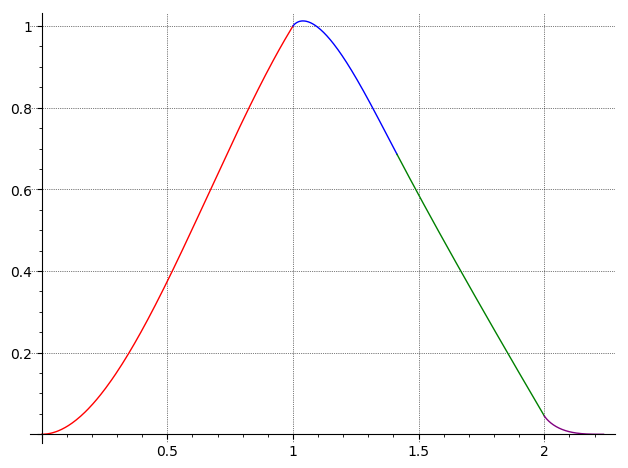

In [17]:
p = plot(f_omega_r1_pdf, (x,0,1), color = 'red', gridlines = True)
p += plot(f_omega_r2_pdf, (x,1,sqrt(2)), color = 'blue')
p += plot(f_omega_r3_pdf, (x,sqrt(2),2), color = 'green')
p += plot(f_omega_r4_pdf, (x,2,sqrt(5)), color = 'purple')
p.show()

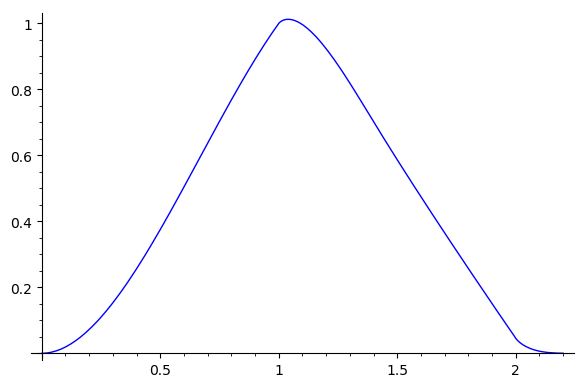

In [32]:
f_omega = piecewise([([0,1], f_omega_r1_pdf), ((1,sqrt(2)), f_omega_r2_pdf), ([sqrt(2), 2], f_omega_r3_pdf), ((2,sqrt(5)), f_omega_r4_pdf)])
plot(f_omega, (x,0,2.2)) #agrees with above

# Emipirical Major-Axis Distrubution
We generate a million random matrices and create a histogram of the resulting major axis lengths, with the theoretical curve superposed.

In [18]:
import numpy as np
from matplotlib import pyplot as plt

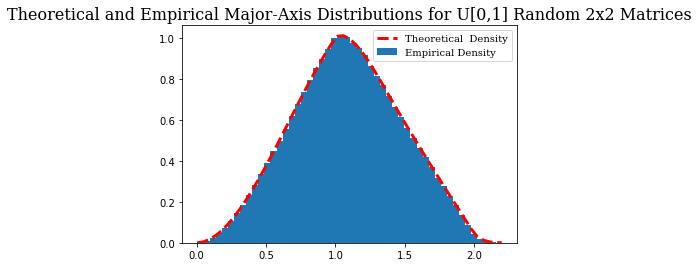

In [68]:
NUM_MATRICES = 10**6
aa = np.random.uniform(0,1, (1,NUM_MATRICES))
bb = np.random.uniform(0,1, (1,NUM_MATRICES))
cc = np.random.uniform(0,1, (1,NUM_MATRICES))
dd = np.random.uniform(0,1, (1,NUM_MATRICES))
omega = np.sqrt((aa-dd)*(aa-dd) + (bb+cc)*(bb+cc))
#fig,ax = plt.subplots(1,1)
n, bins, patches = plt.hist(omega.tolist(), bins=50, density = True, label = 'Empirical Density')
y = np.array(list(map(f_omega, bins))) # https://stackoverflow.com/questions/35215161/most-efficient-way-to-map-function-over-numpy-array
fit_curve = plt.plot(bins, y, 'r--', linewidth=3, label = 'Theoretical  Density')# https://matplotlib.org/1.2.1/examples/pylab_examples/histogram_demo.html
plt.title('Theoretical and Empirical Major-Axis Distributions for U[0,1] Random 2x2 Matrices', fontdict = {'family':'serif', 'size':16})
plt.legend(loc=1, prop = {'family': 'serif'}, fontsize = 'medium') #fontdict = {'family': 'serif', 'size':10}
plt.show()